# Бэггинг и случайный лес

In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from sklearn import model_selection, datasets, ensemble, tree, metrics
%matplotlib inline

In [2]:
digits = datasets.load_digits()

In [3]:
digits.keys()

['images', 'data', 'target_names', 'DESCR', 'target']

In [4]:
digits_frame = pd.DataFrame(digits.data)
digits_target = digits.target

In [5]:
def classifier_score(classifier):
    return model_selection.cross_val_score(classifier, digits_frame, digits_target, cv = 10, n_jobs = -1).mean()

## Задание 1

Создайте DecisionTreeClassifier с настройками по умолчанию и измерьте качество его работы с помощью cross_val_score. Эта величина и будет ответом в пункте 1.

In [6]:
decision_tree_clf = tree.DecisionTreeClassifier()

score = classifier_score(decision_tree_clf)
print score

0.8347099916883793


In [7]:
with open('bagging_1.txt', 'w') as fout:
    fout.write(str(score))

## Задание 2

Воспользуйтесь BaggingClassifier из sklearn.ensemble, чтобы обучить бэггинг над DecisionTreeClassifier. Используйте в BaggingClassifier параметры по умолчанию, задав только количество деревьев равным 100.

Качество классификации новой модели - ответ в пункте 2. Обратите внимание, как соотносится качество работы композиции решающих деревьев с качеством работы одного решающего дерева.

In [8]:
bagging_clf = ensemble.BaggingClassifier(base_estimator = decision_tree_clf, n_estimators = 100)

score = classifier_score(bagging_clf)
print score

0.9221305370221536


In [9]:
with open('bagging_2.txt', 'w') as fout:
    fout.write(str(score))

## Задание 3

Теперь изучите параметры BaggingClassifier и выберите их такими, чтобы каждый базовый алгоритм обучался не на всех d признаках, а на $\sqrt{d}$ случайных признаков. Качество работы получившегося классификатора - ответ в пункте 3. Корень из числа признаков - часто используемая эвристика в задачах классификации, в задачах регрессии же часто берут число признаков, деленное на три. Но в общем случае ничто не мешает вам выбирать любое другое число случайных признаков.

In [10]:
sqrt_bagging_clf = ensemble.BaggingClassifier(base_estimator = decision_tree_clf, 
                                              max_features = int(np.sqrt(digits_frame.shape[1])), 
                                              n_estimators = 100)
score = classifier_score(sqrt_bagging_clf)
print score

0.9316525936157076


In [11]:
with open('bagging_3.txt', 'w') as fout:
    fout.write(str(score))

## Задание 4

Наконец, давайте попробуем выбирать случайные признаки не один раз на все дерево, а при построении каждой вершины дерева. Сделать это несложно: нужно убрать выбор случайного подмножества признаков в BaggingClassifier и добавить его в DecisionTreeClassifier. Какой параметр за это отвечает, можно понять из документации sklearn, либо просто попробовать угадать (скорее всего, у вас сразу получится). Попробуйте выбирать опять же $\sqrt{d}$ признаков. Качество полученного классификатора на контрольной выборке и будет ответом в пункте 4.

In [12]:
decision_tree_clf = tree.DecisionTreeClassifier(max_features = int(np.sqrt(digits_frame.shape[1])))
bagging_clf = ensemble.BaggingClassifier(base_estimator = decision_tree_clf,
                                         n_estimators = 100)

score = classifier_score(bagging_clf)
print score

0.953906225316022


In [13]:
with open('bagging_4.txt', 'w') as fout:
    fout.write(str(score))

## Задание 5

Полученный в пункте 4 классификатор - бэггинг на рандомизированных деревьях (в которых при построении каждой вершины выбирается случайное подмножество признаков и разбиение ищется только по ним). Это в точности соответствует алгоритму Random Forest, поэтому почему бы не сравнить качество работы классификатора с RandomForestClassifier из sklearn.ensemble. Сделайте это, а затем изучите, как качество классификации на данном датасете зависит от количества деревьев, количества признаков, выбираемых при построении каждой вершины дерева, а также ограничений на глубину дерева. Для наглядности лучше построить графики зависимости качества от значений параметров, но для сдачи задания это делать не обязательно.

In [14]:
random_forest_clf = ensemble.RandomForestClassifier(n_estimators = 100, 
                                                    max_features = int(np.sqrt(digits_frame.shape[1])))

classifier_score(random_forest_clf)

0.9517023598981668

Построим графики зависимости качества классификации на данном датасете от количества деревьев, количества признаков, выбираемых при построении каждой вершины дерева, а также ограничений на глубину дерева.

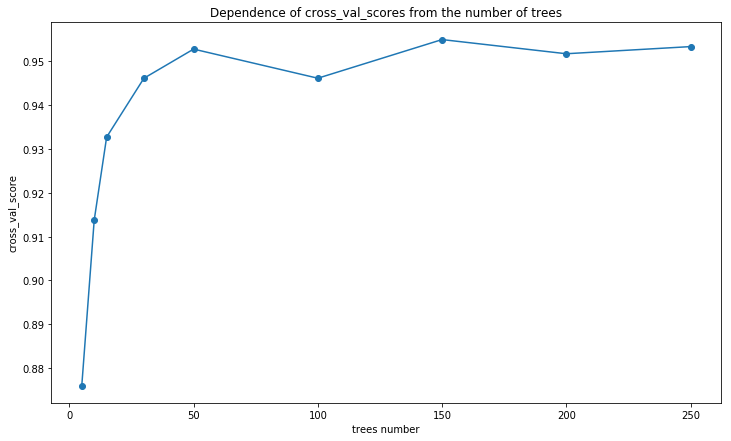

CPU times: user 664 ms, sys: 91.6 ms, total: 755 ms
Wall time: 8.46 s


In [15]:
%%time
num_trees = [5, 10, 15, 30, 50, 100, 150, 200, 250]
cross_val_scores = []

for value in num_trees:
    random_forest_clf = ensemble.RandomForestClassifier(n_estimators = value)
    cross_val_scores.append(classifier_score(random_forest_clf))
    
plt.figure(figsize = (12, 7))
plt.plot(num_trees, cross_val_scores, marker = 'o')
plt.title('Dependence of cross_val_scores from the number of trees')
plt.xlabel('trees number')
plt.ylabel('cross_val_score')
plt.show()

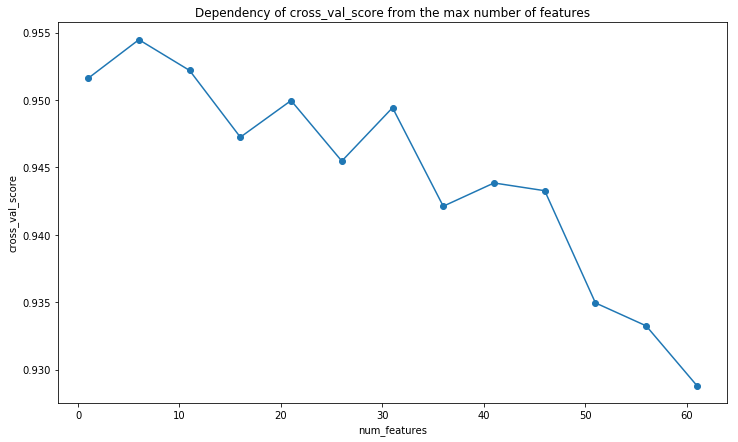

CPU times: user 953 ms, sys: 124 ms, total: 1.08 s
Wall time: 52.5 s


In [16]:
%%time
num_features = np.arange(1, digits_frame.shape[1], 5)
cross_val_scores = []

for value in num_features:
    random_forest_clf = ensemble.RandomForestClassifier(n_estimators = 200, max_features = value)
    cross_val_scores.append(classifier_score(random_forest_clf))

plt.figure(figsize = (12, 7))
plt.plot(num_features, cross_val_scores, marker = 'o')
plt.title('Dependency of cross_val_score from the max number of features')
plt.xlabel('num_features')
plt.ylabel('cross_val_score')
plt.show()

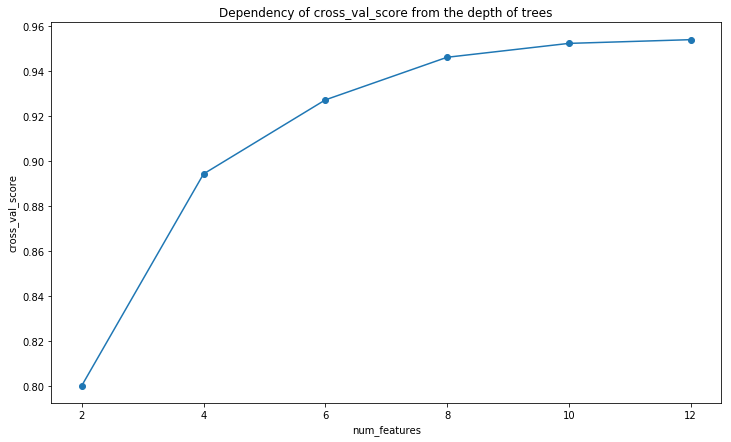

CPU times: user 553 ms, sys: 31.2 ms, total: 585 ms
Wall time: 11.8 s


In [17]:
%%time
depth = [2, 4, 6, 8, 10, 12]
cross_val_scores = []

for value in depth:
    random_forest_clf = ensemble.RandomForestClassifier(n_estimators = 200, max_depth = value)
    cross_val_scores.append(classifier_score(random_forest_clf))
    
plt.figure(figsize = (12, 7))    
plt.plot(depth, cross_val_scores, marker = 'o')
plt.title('Dependency of cross_val_score from the depth of trees')
plt.xlabel('num_features')
plt.ylabel('cross_val_score')
plt.show()

На основе наблюдений выпишите через пробел номера правильных утверждений из приведенных ниже в порядке возрастания номера (это будет ответ в п.5)

1. Случайный лес сильно переобучается с ростом количества деревьев.
2. При очень маленьком числе деревьев (5, 10, 15), случайный лес работает хуже, чем при большем числе деревьев
3. С ростом количества деревьев в случайном лесе, в какой-то момент деревьев становится достаточно для высокого качества классификации, а затем качество существенно не меняется.
4. При большом количестве признаков (для данного датасета - 40, 50) качество классификации становится хуже, чем при малом количестве признаков (5, 10). Это связано с тем, что чем меньше признаков выбирается в каждом узле, тем более различными получаются деревья (ведь деревья сильно неустойчивы к изменениям в обучающей выборке), и тем лучше работает их композиция.
5. При большом количестве признаков (40, 50, 60) качество классификации лучше, чем при малом количестве признаков (5, 10). Это связано с тем, что чем больше признаков - тем больше информации об объектах, а значит алгоритм может делать прогнозы более точно.
6. При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса намного лучше, чем без ограничения глубины, т.к. деревья получаются не переобученными. С ростом глубины деревьев качество ухудшается.
7. При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса заметно хуже, чем без ограничений, т.к. деревья получаются недообученными. С ростом глубины качество сначала улучшается, а затем не меняется существенно, т.к. из-за усреднения прогнозов и различий деревьев их переобученность в бэггинге не сказывается на итоговом качестве (все деревья переобучены по-разному, и при усреднении они компенсируют переобученность друг-друга).

Исходя из полученных графиков зависимостей можно сделать вывод, что верными утверждениями являются 2, 3, 4 и 7.

In [18]:
with open('bagging_5.txt', 'w') as fout:
    fout.write('2 3 4 7')